In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve
import random as rn
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Практическое задание к теме 3

1. Задание (в программе)

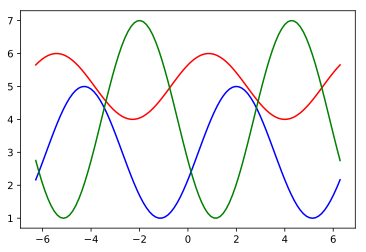

In [9]:
def y(k, x, a, b):
    return k * np.cos(x - a) + b

x = np.linspace(-np.pi*2, np.pi*2,100)

plt.plot(x, y(2, x, 2, 3), color="blue")
plt.plot(x, y(-1, x, 4, 5), color="red")
plt.plot(x, y(3, x, -2, 4), color="green")
plt.show()

1) Напишите код, который будет переводить полярные координаты в декартовы. 

In [10]:
def p2c(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

p2c(1,2)

(-0.4161468365471424, 0.9092974268256817)

2) Напишите код, который будет рисовать график окружности в полярных координатах.

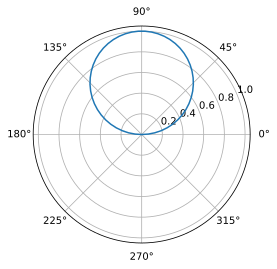

In [11]:
theta = np.linspace(0,np.pi)
r = np.sin(theta)

plt.polar(theta,r)
plt.show()

1) Решите систему уравнений:

In [13]:
def equations(p):
    x, y = p
    return (x**2 - 1 - y, 
            math.exp(x) + x*(1 - y) - 1)

x, y =  fsolve(equations, (1, 1))

print(f'x= {x:2.2f}, y= {y:2.2f}')

x=0.00, y=-1.00


2) Решите систему уравнений и неравенств:

In [14]:
def equations(p):
    x, y = p
    return (x**2 - 1 - y, math.exp(x) + x*(1 - y) - 2)

x, y =  fsolve(equations, (1, 1))

print(f'x= {x:2.2f}, y= {y:2.2f}')

x= 0.33, y= -0.89


# Практическое задание к теме 4


1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [16]:
while True:
    a = input('[any letter] - exit: ')
    if a != "":
        break
    
    r = rn.uniform(0,1)
    print(f'Выпало {math.floor(r * 37)}')

[any letter] - exit: 
Выпало 6
[any letter] - exit: 
Выпало 10
[any letter] - exit: 
Выпало 18
[any letter] - exit: 
Выпало 33
[any letter] - exit: 
Выпало 5
[any letter] - exit: 
Выпало 13
[any letter] - exit: 
Выпало 14
[any letter] - exit: 
Выпало 36
[any letter] - exit: 
Выпало 6
[any letter] - exit: 
Выпало 20
[any letter] - exit: a


2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.

In [17]:
# P(A+B) = P(A) + P(B)

heads = 0
tails = 0

for i in range(100):
    r = rn.uniform(0,1)
    if r < 0.5:
        heads += 1
    else:
        tails += 1
        
print(f'Орлы выпали {heads} раз а решки {tails} и их сумма должна быть равна общему количеству подбросов (100) = {heads+tails}')

Орлы выпали 54 раз а решки 46 и их сумма должна быть равна общему количеству подбросов (100) = 100


2.2 Сгенерируйте десять выборок случайных чисел х0, ..., х9. и постройте гистограмму распределения случайной суммы х0+х1+ ...+ х9.

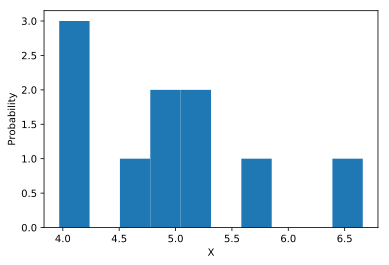

In [18]:
x = []
for i in range(10):
    x.append(np.random.rand(10).sum())

plt.hist(x, bins=10)
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

3.2 Повторите расчеты, взяв другие значения n и k.

In [19]:
def Ckn(k, n):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n-k))

def P(k, n):
    return Ckn(k, n)/2**n

def monte(k, n, cnt=10000):
    x = np.random.randint(0, 2, cnt)
    for i in range(n-1):
        x = x + np.random.randint(0, 2, cnt)
    
    r = 0
    for i in range(0, cnt):
        if x[i] == k:
            r += 1
    return r/cnt

def results(k, n):
    print(f'K = {k}\nN = {n}\nMonte = {monte(k, n):2.5f}\nP = {P(k, n):2.5f}\nCkn = {Ckn(k, n):2.2f}\n----------')

results(2, 4)
results(2, 8)
results(3, 10)
results(5, 20)

K = 2
N = 4
Monte = 0.37120
P = 0.37500
Ckn = 6.00
----------
K = 2
N = 8
Monte = 0.11030
P = 0.10938
Ckn = 28.00
----------
K = 3
N = 10
Monte = 0.11820
P = 0.11719
Ckn = 120.00
----------
K = 5
N = 20
Monte = 0.01250
P = 0.01479
Ckn = 15504.00
----------


4.Повторите расчеты, взяв другие значения n и k.

In [20]:
def perm(k, n):
    st = ''.join([str(i) for i in range(n)])
    r = [''.join(p) for p in itertools.permutations(st, k)]
    return r

def comb(k, n):
    st = ''.join([str(i) for i in range(n)])
    r = [''.join(p) for p in itertools.combinations(st, k)]
    return r

def cres(k, n):
    p = perm(k, n)
    c = comb(k, n)
    print(f'Для k={k} и n={n}:\n {len(p):5} Перестановок: {p}\n {len(c):5} Сочетаний: {c}\n---------')


cres(2,4)
cres(3,5)
cres(3,4)

Для k=2 и n=4:
    12 Перестановок: ['01', '02', '03', '10', '12', '13', '20', '21', '23', '30', '31', '32']
     6 Сочетаний: ['01', '02', '03', '12', '13', '23']
---------
Для k=3 и n=5:
    60 Перестановок: ['012', '013', '014', '021', '023', '024', '031', '032', '034', '041', '042', '043', '102', '103', '104', '120', '123', '124', '130', '132', '134', '140', '142', '143', '201', '203', '204', '210', '213', '214', '230', '231', '234', '240', '241', '243', '301', '302', '304', '310', '312', '314', '320', '321', '324', '340', '341', '342', '401', '402', '403', '410', '412', '413', '420', '421', '423', '430', '431', '432']
    10 Сочетаний: ['012', '013', '014', '023', '024', '034', '123', '124', '134', '234']
---------
Для k=3 и n=4:
    24 Перестановок: ['012', '013', '021', '023', '031', '032', '102', '103', '120', '123', '130', '132', '201', '203', '210', '213', '230', '231', '301', '302', '310', '312', '320', '321']
     4 Сочетаний: ['012', '013', '023', '123']
---------


5.Дополните код расчетом коэффициента корреляции  x и  y по формуле

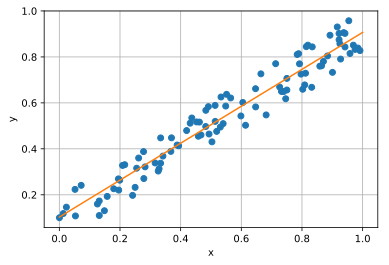

0.9699790828811307 0.9699790828811301


In [21]:
n = 100
r = 0.8
x = np.random.rand(n)
y = r*x + (1-r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = ( np.sum(x)*np.sum(y) - n*np.sum(x*y) ) / ( np.sum(x)*np.sum(x) - n*np.sum(x*x) )
b = ( np.sum(y) - a*np.sum(x) ) / n

plt.plot([0, 1], [b, a+b])
plt.show()


xm = x - x.mean()
ym = y - y.mean()

R = np.sum(xm*ym) / math.sqrt( np.sum(xm**2) * np.sum(ym**2) )

c = np.corrcoef(x, y)
print(R, c[0][1])